# License Status Prediction - Multiclass Classification
<hr style="border:1px solid gray"> </hr>

## Contents.

    1. Problem Description
    2. Data Exploration
    3. Feature Selection
    4. KNN Algorithm
    5. Naive Bias
    5. Logistic Regression
    6. Decisoin Tree
    
    
--------------------------------------------------------------------------------------------------------------------------------


### Problem Description

We are given a license dataset which holds various information related the business license , The objective of out problem is to predict license Status for the given business. Lets start with delving deep into the data.
________________________________________________________________________________________________________________________________

In [ ]:
# !pip install category_encoders

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import category_encoders as ce

In [ ]:
# read the df
df = pd.read_csv("/content/drive/MyDrive/License_Data.csv")

# print the shape of the dataframe
print(df.shape)

# show the top few rows
display(df.head().T)

(85895, 32)


<ipython-input-7-bc0b30da8cbf>:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/License_Data.csv")


,0,1,2,3,4
ID,35342-20020816,1358463-20051116,1980233-20090722,1476582-20040211,1141408-20080516
LICENSE ID,1256593,1639294,1980233,1476582,1896750
ACCOUNT NUMBER,32811,262311,345008,273121,213785
SITE NUMBER,1,29,1,1,1
LEGAL NAME,CARMEN CAHUE,"ISLA TROPICAL, INC.",DJS REMODELING,ALL-BRY CONSTRUCTION CO.,MCDONOUGH MECHANICAL SERVICE
DOING BUSINESS AS NAME,CLAUDIA'S BRIDAL SHOP,ISLA TROPICAL,"DJS REMODELING, INC.",ALL-BRY CONSTRUCTION CO.,MCDONOUGH MECHANICAL SERVICE
ADDRESS,2625 S CENTRAL PARK AVE 1,2825 W MONTROSE AVE,1605 CLAVEY RD 1,8 NORTH TRAIL,4081 JOSEPH DR
CITY,CHICAGO,CHICAGO,HIGHLAND,LEMONT,WAUKEGAN
STATE,IL,IL,IL,IL,IL
ZIP CODE,60623.0,60618,60035,60439,60087


In [ ]:
# change the columns name
new_col_name = [col.replace(" ","_").lower() for col in df.columns]
df.columns = new_col_name
print(new_col_name)

['id', 'license_id', 'account_number', 'site_number', 'legal_name', 'doing_business_as_name', 'address', 'city', 'state', 'zip_code', 'ward', 'precinct', 'ward_precinct', 'police_district', 'license_code', 'license_description', 'license_number', 'application_type', 'application_created_date', 'application_requirements_complete', 'payment_date', 'conditional_approval', 'license_term_start_date', 'license_term_expiration_date', 'license_approved_for_issuance', 'date_issued', 'license_status_change_date', 'ssa', 'latitude', 'longitude', 'location', 'license_status']


## Variable Description

<b>Dependent Variable</b>   <br>
&nbsp;&nbsp;&nbsp;&nbsp;    1. AAI - License status is issued <br>
&nbsp;&nbsp;&nbsp;&nbsp;    2. AAC - License status is cancelled <br>
&nbsp;&nbsp;&nbsp;&nbsp;    3. REV - License status is revoked <br>
&nbsp;&nbsp;&nbsp;&nbsp;    4. REA - License status is revoked and appealed <br>
&nbsp;&nbsp;&nbsp;&nbsp;    5. INQ - License status is in enquiry <br>
    <br>
<b>Independent Variable</b> : <br>
&nbsp;&nbsp;&nbsp;&nbsp;    Timeline of the application status <br>
&nbsp;&nbsp;&nbsp;&nbsp;    Type of business <br>
&nbsp;&nbsp;&nbsp;&nbsp;    Location details of the business <br>
&nbsp;&nbsp;&nbsp;&nbsp;    Payment details <br>
_______________________________________________________________________________________________________________________________

In [ ]:
df.columns

Index(['id', 'license_id', 'account_number', 'site_number', 'legal_name',
       'doing_business_as_name', 'address', 'city', 'state', 'zip_code',
       'ward', 'precinct', 'ward_precinct', 'police_district', 'license_code',
       'license_description', 'license_number', 'application_type',
       'application_created_date', 'application_requirements_complete',
       'payment_date', 'conditional_approval', 'license_term_start_date',
       'license_term_expiration_date', 'license_approved_for_issuance',
       'date_issued', 'license_status_change_date', 'ssa', 'latitude',
       'longitude', 'location', 'license_status'],
      dtype='object')

## Data Cleansing

1. Missing Values - lot of missing data for particular variables
2. Unique Data - id (no meaning)
3. Data leakage - The AAI alone doesn't have licesnse status change value (as the license are never revoked/cancelled)


In [ ]:
df.isnull().sum()

id                                       0
license_id                               0
account_number                           0
site_number                              0
legal_name                               0
doing_business_as_name                   1
address                                  0
city                                     0
state                                    0
zip_code                                31
ward                                 49701
precinct                             56701
ward_precinct                        49700
police_district                      54012
license_code                             0
license_description                      0
license_number                           1
application_type                         0
application_created_date             64660
application_requirements_complete      214
payment_date                          1289
conditional_approval                     0
license_term_start_date                228
license_ter

In [ ]:
# Drop columns which are not relevent for the prediction / too many missing values
drop_col_list = ["id","license_id","ssa","location","application_created_date","account_number","address"]
df = df.drop(drop_col_list, axis=1)

In [ ]:
df["license_status_change"] = np.where(df.license_status_change_date.isnull(),1,0)

In [ ]:
pd.crosstab(df.license_status_change,df.license_status)

license_status,AAC,AAI,INQ,REA,REV
license_status_change,,,,,
0,30200,0,2,3,290
1,0,55400,0,0,0


## Data Transformation
1. Timeline creation
2. Encoding
3. New Feature

In [ ]:
# convert string object into date
df.application_requirements_complete = pd.DatetimeIndex(df.application_requirements_complete)
df.payment_date = pd.DatetimeIndex(df.payment_date)
df.license_term_start_date = pd.DatetimeIndex(df.license_term_start_date)
df.license_term_expiration_date = pd.DatetimeIndex(df.license_term_expiration_date)
df.license_approved_for_issuance = pd.DatetimeIndex(df.license_approved_for_issuance)
df.date_issued = pd.DatetimeIndex(df.date_issued)

In [ ]:
# Find no.of days btw different application status date
df["completion_to_start"] = (df.license_term_start_date - df.application_requirements_complete).dt.days
df["start_to_expiry"] =  (df.license_term_expiration_date - df.license_term_start_date).dt.days
df["approval_to_issuance"] = (df.date_issued - df.license_approved_for_issuance).dt.days
df["completion_to_payment"] = (df.payment_date - df.application_requirements_complete).dt.days

df["presence_of_enquiry_details"] = np.where(df.ward.isnull() | df.ward_precinct.isnull() | df.police_district | df.precinct , 0 ,1 )

df["target"] = df[['license_status']].apply(lambda col:pd.Categorical(col).codes)

In [ ]:
df.city.unique()

array(['CHICAGO', 'HIGHLAND', 'LEMONT', ..., 'ABERDEEN', 'PENSACOLA',
       'MACHESNEY PARK'], dtype=object)

In [ ]:
enc=ce.OneHotEncoder().fit(df.target.astype(str))
y_onehot=enc.transform(df.target.astype(str))
print(y_onehot.columns)

Index(['target_1', 'target_2', 'target_3', 'target_4', 'target_5'], dtype='object')


## Target Encoding

In [ ]:
enc=ce.OneHotEncoder().fit(df.target.astype(str))
y_onehot=enc.transform(df.target.astype(str))

class_names = y_onehot.columns
for class_ in class_names:
  enc = ce.TargetEncoder(smoothing=0)
  temp = enc.fit_transform(df[["license_description","state","city"]],y_onehot[class_])
  temp.columns=[str(x)+'_'+str(class_) for x in temp.columns]
  df = pd.concat([df,temp],axis=1)

### Class Imbalance

In [ ]:
df.head()

,site_number,legal_name,doing_business_as_name,city,state,zip_code,ward,precinct,ward_precinct,police_district,...,city_target_2,license_description_target_3,state_target_3,city_target_3,license_description_target_4,state_target_4,city_target_4,license_description_target_5,state_target_5,city_target_5
0,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,CHICAGO,IL,60623.0,22.0,28.0,22-28,10.0,...,0.702863,0.001118,0.0036,0.007865,0.0,0.000037,0.000082,0.000020,0.000025,0.0
1,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,CHICAGO,IL,60618,33.0,23.0,33-23,17.0,...,0.702863,0.000000,0.0036,0.007865,0.0,0.000037,0.000082,0.000000,0.000025,0.0
2,1,DJS REMODELING,"DJS REMODELING, INC.",HIGHLAND,IL,60035,NaN,NaN,NaN,NaN,...,0.185185,0.000000,0.0036,0.000000,0.0,0.000037,0.000000,0.000094,0.000025,0.0
3,1,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,LEMONT,IL,60439,NaN,NaN,NaN,NaN,...,0.067278,0.001118,0.0036,0.000000,0.0,0.000037,0.000000,0.000020,0.000025,0.0
4,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,WAUKEGAN,IL,60087,NaN,NaN,NaN,NaN,...,0.061350,0.001118,0.0036,0.000000,0.0,0.000037,0.000000,0.000020,0.000025,0.0


In [ ]:
df.license_status.value_counts()

AAI    55400
AAC    30200
REV      290
REA        3
INQ        2
Name: license_status, dtype: int64

In [ ]:
df.license_status.value_counts(normalize=True).mul(100).round(3).astype(str) + '%'

AAI    64.497%
AAC    35.159%
REV     0.338%
REA     0.003%
INQ     0.002%
Name: license_status, dtype: object

## over sampling/under sampling

In [ ]:
np.sort(df.target.unique()).tolist()

[0, 1, 2, 3, 4]

In [ ]:
# Undersampling
df_0 = df[df.target==0].sample(frac=0.3,replace=False)
df_1 = df[df.target==1].sample(frac=0.3,replace=False)
# oversamplig
df_2 = df[df.target==2].sample(frac=200,replace=True)
df_3 = df[df.target==3].sample(frac=100,replace=True)
df_4 = df[df.target==4].sample(frac=2,replace=True)

sampled_df = pd.concat([df_0,df_1,df_2,df_3,df_4])

sampled_df.target.value_counts()

1    16620
0     9060
4      580
2      400
3      300
Name: target, dtype: int64

## Train / Test Data Preparation

In [ ]:
X = sampled_df[['latitude', 'longitude', 'completion_to_start',
                'start_to_expiry', 'approval_to_issuance', 'completion_to_payment',
                'presence_of_enquiry_details',  'license_description_target_1',
                'state_target_1', 'city_target_1', 'license_description_target_2',
                'state_target_2', 'city_target_2', 'license_description_target_3',
                'state_target_3', 'city_target_3', 'license_description_target_4',
                'state_target_4', 'city_target_4', 'license_description_target_5',
                'state_target_5', 'city_target_5']]

y = sampled_df['target']

In [ ]:
# mean imputation
X = X.fillna(X.mean())

In [ ]:
# Train/test preparation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)

## Modeling

In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

knn_model.fit((scaler.transform(X_train)),y_train)
scaler.fit(X_test)
y_pred = knn_model.predict(scaler.transform(X_test))

In [ ]:
# Metrics Performance
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73       895
           1       0.85      0.89      0.87      1684
           2       0.00      0.00      0.00        35
           3       0.93      1.00      0.96        26
           4       0.41      0.55      0.47        56

    accuracy                           0.81      2696
   macro avg       0.59      0.63      0.61      2696
weighted avg       0.80      0.81      0.80      2696



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Metrics Performance
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.32      0.43       895
           1       0.70      0.95      0.81      1684
           2       0.00      0.00      0.00        35
           3       0.00      0.00      0.00        26
           4       0.00      0.00      0.00        56

    accuracy                           0.70      2696
   macro avg       0.28      0.25      0.25      2696
weighted avg       0.67      0.70      0.65      2696



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Metrics Performance
print(confusion_matrix(y_test,y_pred))

[[ 286  608    1    0    0]
 [  83 1598    2    1    0]
 [   0   35    0    0    0]
 [  26    0    0    0    0]
 [  26   30    0    0    0]]


In [ ]:
# Naive Bias
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
y_pred = nb_model.fit(X_train, y_train).predict(X_test)

In [ ]:
# Metrics Performance
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.20      0.28       895
           1       0.91      0.84      0.87      1684
           2       1.00      1.00      1.00        35
           3       0.20      1.00      0.33        26
           4       0.07      0.80      0.13        56

    accuracy                           0.63      2696
   macro avg       0.54      0.77      0.53      2696
weighted avg       0.75      0.63      0.66      2696



In [ ]:
print(confusion_matrix(y_test,y_pred))

[[ 178  142    0   92  483]
 [ 178 1417    0    5   84]
 [   0    0   35    0    0]
 [   0    0    0   26    0]
 [   1    3    0    7   45]]


In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=0)
y_pred = dt_model.fit(X_train, y_train).predict(X_test)

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier()

DecisionTreeClassifier()

In [ ]:
# Metrics Performance
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       895
           1       0.90      0.89      0.89      1684
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        26
           4       0.88      0.95      0.91        56

    accuracy                           0.86      2696
   macro avg       0.91      0.93      0.92      2696
weighted avg       0.87      0.86      0.87      2696



In [ ]:
print(confusion_matrix(y_test,y_pred))

[[ 722  166    0    0    7]
 [ 188 1496    0    0    0]
 [   0    0   35    0    0]
 [   0    0    0   26    0]
 [   3    0    0    0   53]]


In [ ]:
# Finding the variable with more importance
feature_importance = pd.DataFrame([X_train.columns, dt_model.feature_importances_])
feature_importance = feature_importance.T.sort_values(by = 1, ascending=False)[1:10]

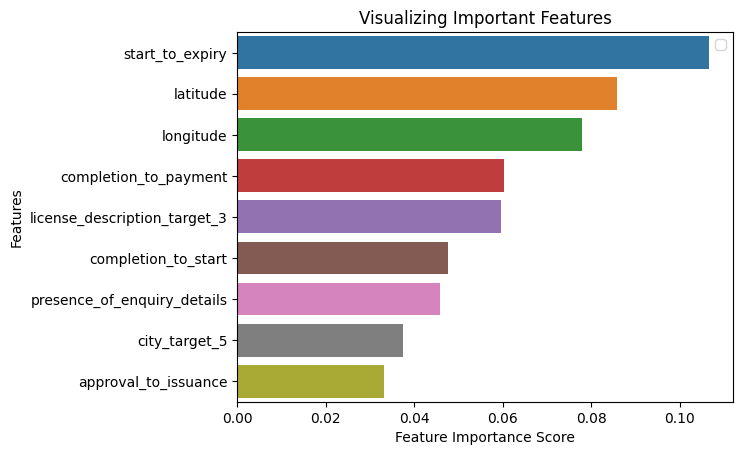

In [ ]:
import seaborn as sns
sns.barplot(x=feature_importance[1], y=feature_importance[0])
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
# Random Tree
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=1)
y_pred = rf_model.fit(X_train, y_train).predict(X_test)

In [ ]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Metrics Performance
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       895
           1       0.92      0.92      0.92      1684
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        26
           4       1.00      0.95      0.97        56

    accuracy                           0.90      2696
   macro avg       0.95      0.94      0.95      2696
weighted avg       0.90      0.90      0.90      2696



In [ ]:
# Finding the variable with more importance
feature_importance = pd.DataFrame([X_train.columns, rf_model.feature_importances_])
feature_importance = feature_importance.T.sort_values(by = 1, ascending=False)[1:10]

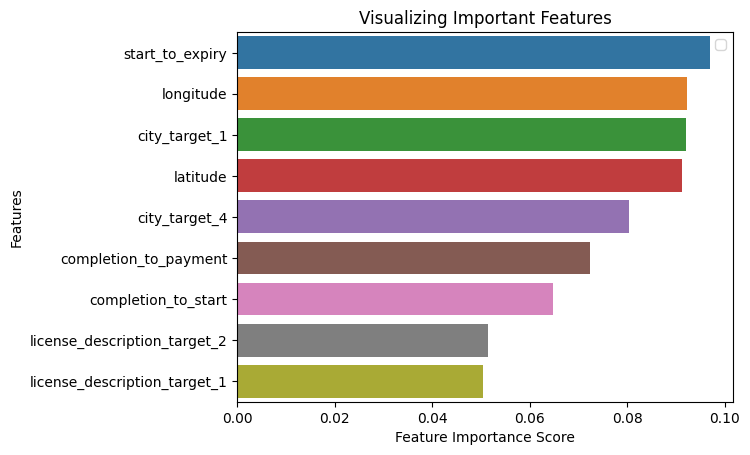

In [ ]:
import seaborn as sns
sns.barplot(x=feature_importance[1], y=feature_importance[0])
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(random_state=0)
ada_model.fit(X_train,y_train)

AdaBoostClassifier(random_state=0)

In [ ]:
y_pred = ada_model.predict(X_test)

In [ ]:
# Metrics Performance
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.85      0.75       895
           1       0.91      0.79      0.85      1684
           2       0.67      1.00      0.80        35
           3       0.70      0.27      0.39        26
           4       0.29      0.14      0.19        56

    accuracy                           0.80      2696
   macro avg       0.65      0.61      0.60      2696
weighted avg       0.81      0.80      0.80      2696



In [ ]:
# xg Boost
from xgboost import XGBClassifier

In [ ]:
X_train.shape

(24264, 22)

In [ ]:
xg_model = XGBClassifier(random_state=1)
xg_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
y_pred = xg_model.predict(X_test)

In [ ]:
from sklearn import metrics
metrics.f1_score(y_test,y_pred,average="macro")

0.9394506465646011

In [ ]:
# Metrics Performance
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       895
           1       0.93      0.93      0.93      1684
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        26
           4       0.96      0.88      0.92        56

    accuracy                           0.90      2696
   macro avg       0.95      0.93      0.94      2696
weighted avg       0.90      0.90      0.90      2696



In [ ]:
# Finding the variable with more importance
feature_importance = pd.DataFrame([X_train.columns, xg_model.feature_importances_])
feature_importance = feature_importance.T.sort_values(by = 1, ascending=False)[1:10]

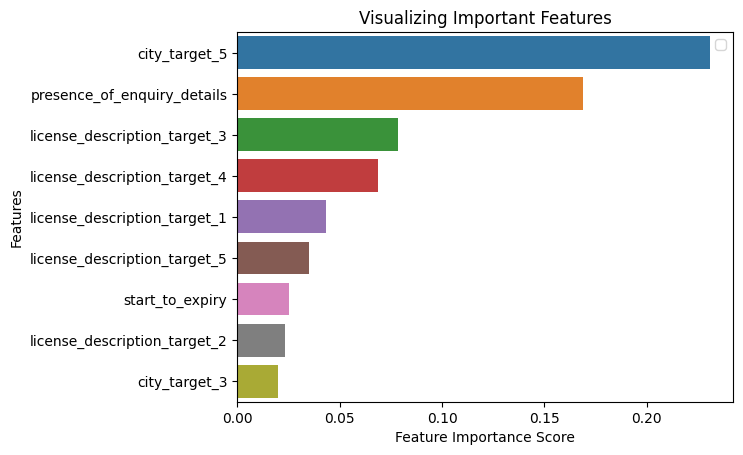

In [ ]:
import seaborn as sns
sns.barplot(x=feature_importance[1], y=feature_importance[0])
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
# Hyperparameter Tuning - Tree parameters
# 1. No. of trees
# 2. Depth of the trees
# 3. Min no. of samples in the leaf node
# 4. Max number of features
# 5. Split Criterion

In [ ]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [ ]:
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,15,20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,10]

In [ ]:
n_estimators

[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]

In [ ]:
max_depth

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]

In [ ]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'min_samples_leaf':[1]
               }
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10, 15, 20], 'min_samples_leaf': [1]}


In [ ]:
rf_random = RandomizedSearchCV(estimator = rf_model,
                               param_distributions = random_grid, n_iter = 10, cv = 3,
                               verbose=2, random_state=42, n_jobs = -1)

In [ ]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
best_params_= rf_random.best_params_
best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 90}

In [ ]:
rf_model_tuned = RandomForestClassifier(**best_params_)

In [ ]:
rf_model_tuned

RandomForestClassifier(max_depth=90, min_samples_split=5, n_estimators=200)

In [ ]:
rf_model_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=90, min_samples_split=5, n_estimators=200)

In [ ]:
y_pred = rf_model_tuned.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       895
           1       0.92      0.92      0.92      1684
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        26
           4       0.98      0.86      0.91        56

    accuracy                           0.90      2696
   macro avg       0.95      0.93      0.94      2696
weighted avg       0.90      0.90      0.90      2696



In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Create the parameter grid based on the results of random search
param_grid = {
    'max_depth': [50,100,150,None],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [2,4,5,6],
    'n_estimators': [50,100,150,200]
}

grid_search = GridSearchCV(estimator = rf_model, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
4*3*4*4*3

576

In [ ]:
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 192 candidates, totalling 576 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [50, 100, 150, None],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [2, 4, 5, 6],
                         'n_estimators': [50, 100, 150, 200]},
             verbose=2)

In [ ]:
grid_search.best_params_

{'max_depth': 50,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 150}

In [ ]:
rf_grid_tuned = RandomForestClassifier(**grid_search.best_params_)

In [ ]:
rf_grid_tuned.fit(X_train,y_train)

RandomForestClassifier(max_depth=50, min_samples_leaf=3, n_estimators=150)

In [ ]:
# RandomForestClassifier(max_depth=50, min_samples_leaf=3, n_estimators=150)

In [ ]:
y_pred = rf_grid_tuned.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       895
           1       0.92      0.92      0.92      1684
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        26
           4       0.97      0.66      0.79        56

    accuracy                           0.89      2696
   macro avg       0.95      0.89      0.91      2696
weighted avg       0.90      0.89      0.89      2696



In [ ]:
# Hyper paramater tuning using hyper opt

In [ ]:
from hyperopt import hp,fmin,tpe,Trials

In [ ]:
# Create the parameter grid based on the results of random search
param_grid_space ={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180
    }

In [ ]:
def optimize(param_grid_space):
    X_train,y_train,X_test,y_test
    xgbm = XGBClassifier(n_estimators =param_grid_space['n_estimators'], max_depth = int(param_grid_space['max_depth']),
                         gamma = param_grid_space['gamma']
                        )
    xgbm.fit(X_train, y_train)
    y_pred = xgbm.predict(X_test)
    f1score = metrics.f1_score(y_test,y_pred,average="macro")
    return -1*f1score

In [ ]:
trial = Trials()
result = fmin(fn=optimize,space=param_grid_space,max_evals=3,trials=trial,algo=tpe.suggest)


100%|██████████| 3/3 [02:26<00:00, 48.82s/trial, best loss: -0.9323787123045563]


In [ ]:
print(result)

{'colsample_bytree': 0.9042571183257062, 'gamma': 1.8249564800877636, 'max_depth': 13.0, 'min_child_weight': 5.0, 'reg_alpha': 94.0, 'reg_lambda': 0.6068306906381222}


In [ ]:
result["max_depth"] = int(result["max_depth"])

In [ ]:
xg_model = XGBClassifier(**result)
xg_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9042571183257062, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.8249564800877636, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=13,
              max_leaves=None, min_child_weight=5.0, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob',
              predictor=None, ...)

In [ ]:
y_pred = xg_model.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       895
           1       0.91      0.90      0.91      1684
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        26
           4       1.00      0.25      0.40        56

    accuracy                           0.87      2696
   macro avg       0.94      0.80      0.82      2696
weighted avg       0.87      0.87      0.86      2696

